In [1]:
import numpy as np
import matplotlib.pyplot as plt
import cv2
from PIL import Image
import os

In [2]:
# Lets read images with Mask and Images without Mask
mask_img0 = Image.open('C:/Users/dell/Downloads/Image/train/with_mask/9-with-mask.jpg')
mask_img1 = Image.open('C:/Users/dell/Downloads/Image/train/with_mask/10-with-mask.jpg')
without_mask_img0 = Image.open('C:/Users/dell/Downloads/Image/train//without_mask/9.jpg')

In [3]:
fig = plt.figure(figsize = (20,9))
# Add subplotting to display multilple images
a1 = fig.add_subplot(1, 3, 1)
img_plot = plt.imshow(mask_img0)
a1.set_title("With Mask", fontsize = 10)

Text(0.5, 1.0, 'With Mask')

Text(0.5, 1.0, 'With Mask')

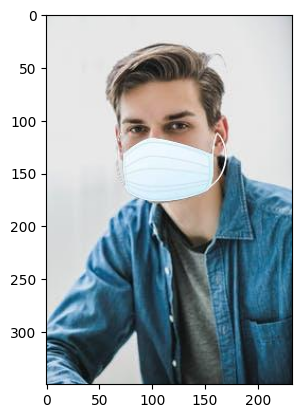

In [4]:
# Add subplotting to display multilple images
a2 = fig.add_subplot(1, 3, 2)
img_plot = plt.imshow(mask_img1)
a2.set_title("With Mask", fontsize = 10)

Text(0.5, 1.0, 'Without Mask')

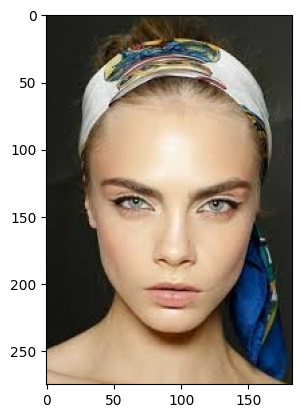

In [5]:
# Add subplotting to display multilple images
a3 = fig.add_subplot(1, 3, 3)
img_plot = plt.imshow(without_mask_img0)
a3.set_title("Without Mask", fontsize = 10)

#### image Data Augmentation
    * All RGB Image Data will be used to create new samples for training.
    * New Sample will be transformed using Image Data Generator.
    * Here, Images will be resampled using pixel normalization (Divide each pixel value by 255), add transformation like , shear, zoom, brightness, flip, rotation etc.

In [6]:
from tensorflow.keras.preprocessing.image import load_img
from tensorflow.keras.preprocessing.image import ImageDataGenerator, img_to_array
from numpy import expand_dims

In [7]:
# Load Image()
img = load_img('C:/Users/dell/Downloads/Image/train/with_mask/10-with-mask.jpg')
# Convert Image to an Array
data = img_to_array(img)
data.shape

(350, 233, 3)

In [8]:
samples = expand_dims(data, axis = 0)

In [9]:
# 1 => Num of Images, shape of image => 350 x 233 x 3
samples.shape

(1, 350, 233, 3)

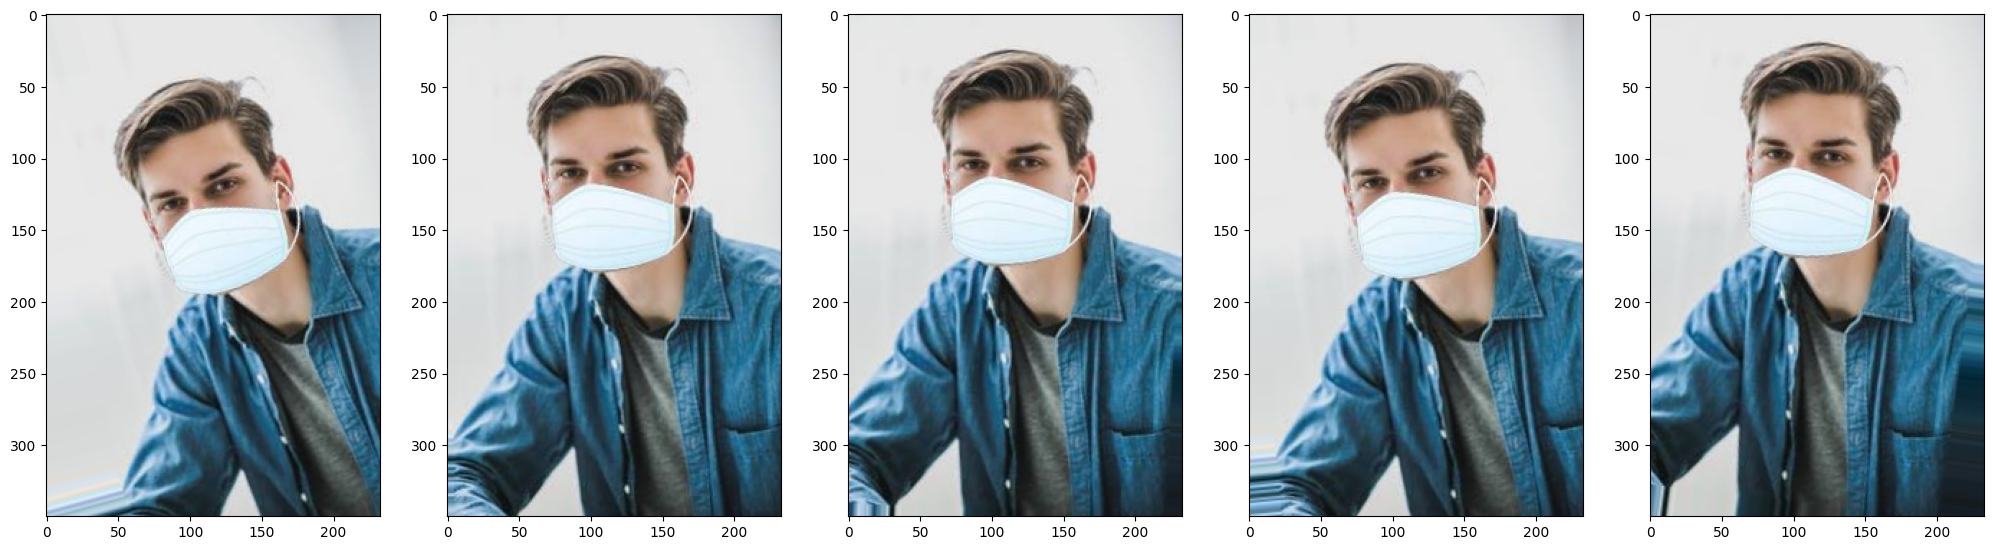

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

In [10]:
# Rotation of Image , 20 degree is maximum rotation
datagen = ImageDataGenerator(rotation_range = 20)
IDG = datagen.flow(samples, batch_size = 1)
fig, ax = plt.subplots(1, 5, figsize = (25,15))
for i in range(5):
    fig = plt.figure()
    batch = IDG.next()
    image1 = batch[0].astype('uint8')
    ax[i].imshow(image1)
plt.show()

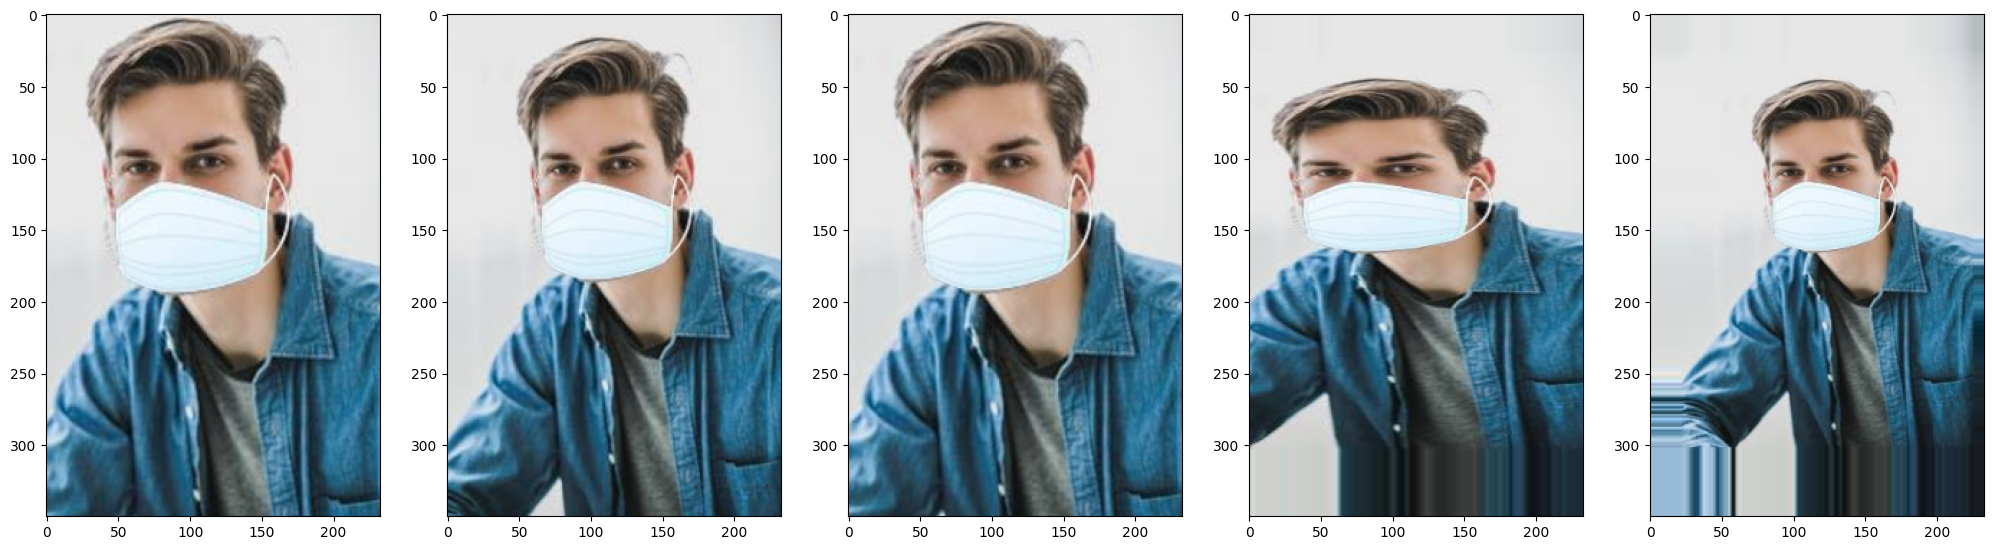

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

In [11]:
# Zoom Image Data -> zoom in or zoom out
datagen = ImageDataGenerator(zoom_range = 0.3)
IDG = datagen.flow(samples, batch_size = 1)
fig, ax = plt.subplots(1, 5, figsize = (25,15))
for i in range(5):
    fig = plt.figure()
    batch = IDG.next()
    image1 = batch[0].astype('uint8')
    ax[i].imshow(image1)
plt.show()

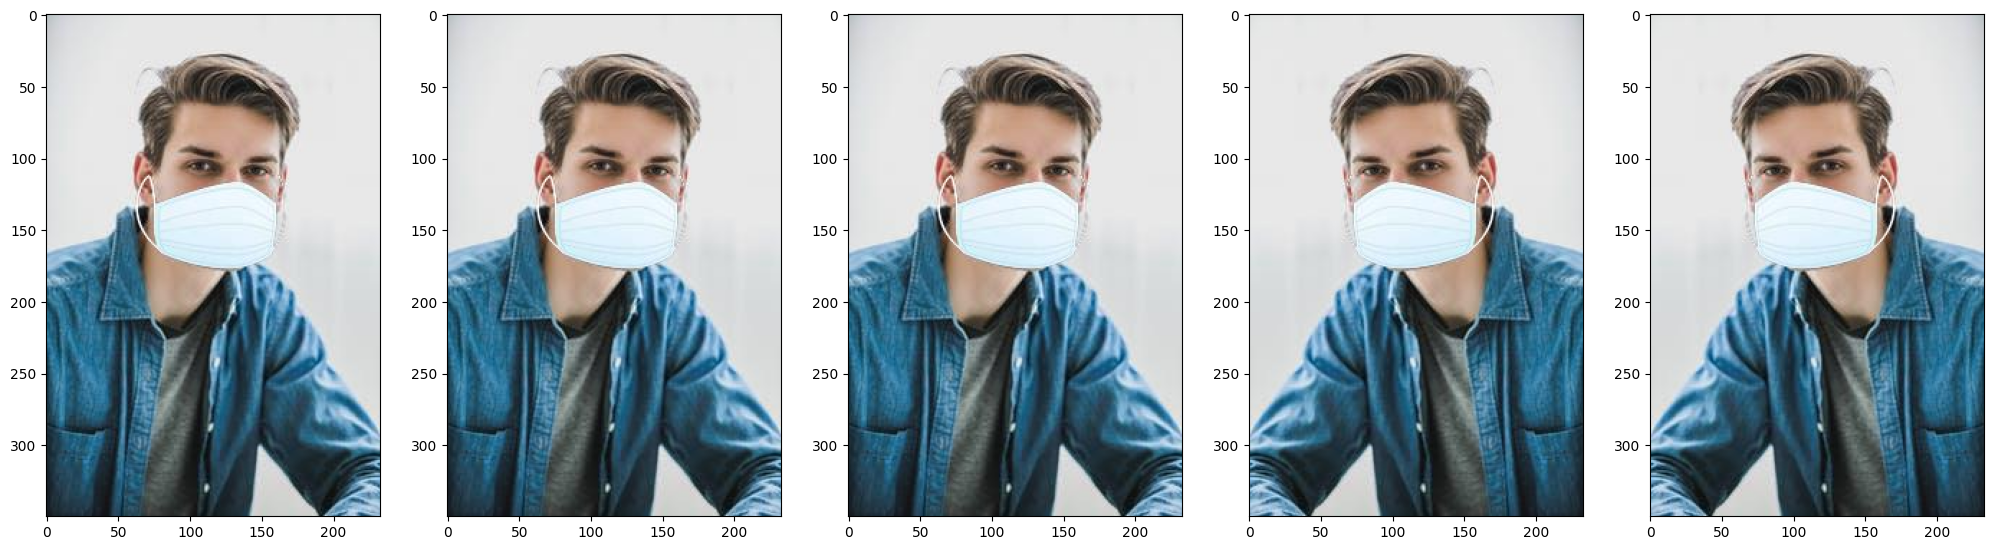

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

In [12]:
# Horizontal Flip
datagen = ImageDataGenerator(horizontal_flip = True)
IDG = datagen.flow(samples, batch_size = 1)
fig, ax = plt.subplots(1, 5, figsize = (25,15))
for i in range(5):
    fig = plt.figure()
    batch = IDG.next()
    image1 = batch[0].astype('uint8')
    ax[i].imshow(image1)
plt.show()

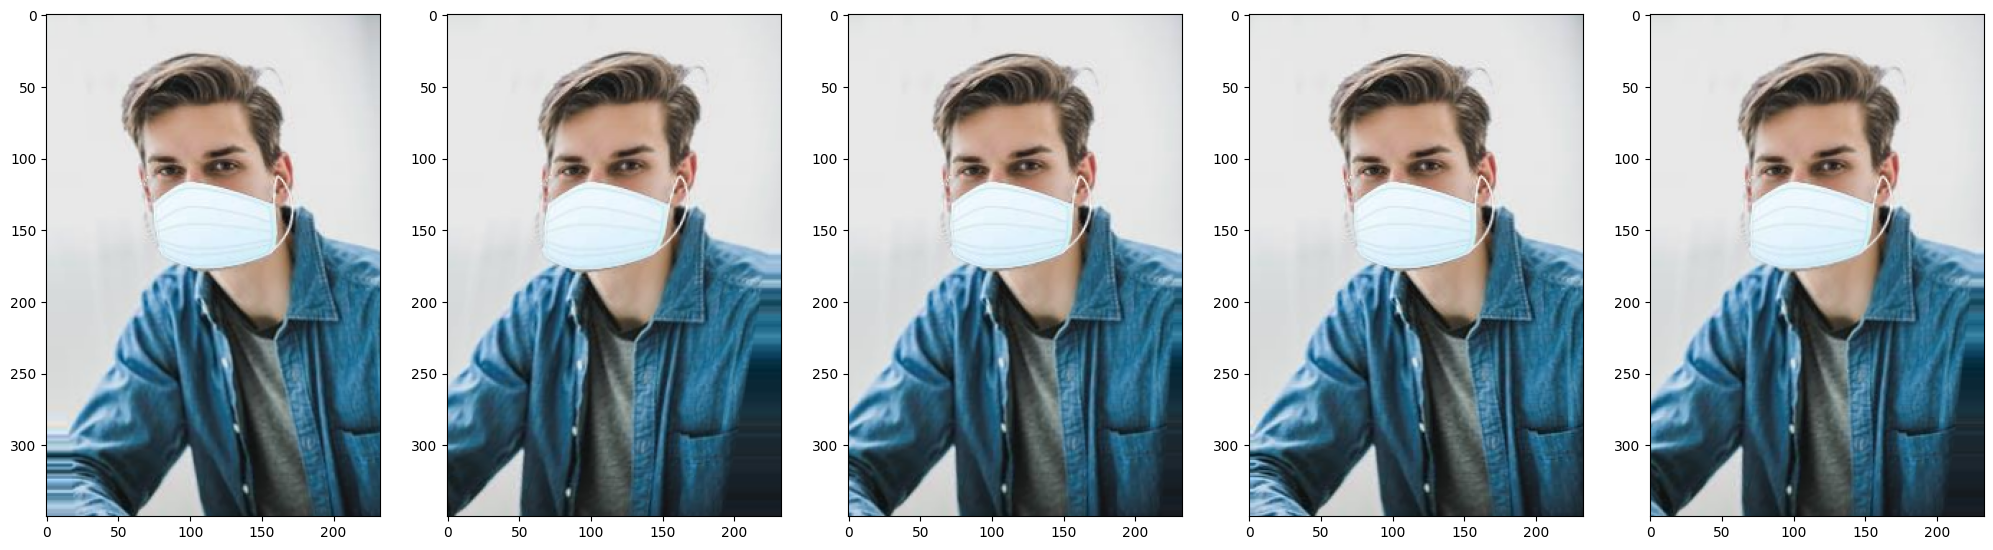

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

In [13]:
# Shear Transformation of Image Data
datagen = ImageDataGenerator(shear_range = 10)
IDG = datagen.flow(samples, batch_size = 1)
fig, ax = plt.subplots(1, 5, figsize = (25,15))
for i in range(5):
    fig = plt.figure()
    batch = IDG.next()
    image1 = batch[0].astype('uint8')
    ax[i].imshow(image1)
plt.show()

#### Apply IDG on Multiple Images

In [14]:
# image Pixel Normalization
# Train Image Datagenerator
# 1./255 => Image Pixel Scaling
train_datagen = ImageDataGenerator(rescale= 1./255, rotation_range=20, shear_range=10, zoom_range=0.2,
                                  horizontal_flip=True,fill_mode='nearest')
# Test Image Data Generator
test_datagen = ImageDataGenerator(rescale = 1./255)


In [15]:
# Reshaping all images to new shape of (150 x 150), 
# batch_size = 16 (num of images trained in each iteration)
training_set = train_datagen.flow_from_directory('C:/Users/dell/Downloads/Image/train/', target_size=(150,150),
                                                batch_size=16, class_mode='binary')
test_set = test_datagen.flow_from_directory('C:/Users/dell/Downloads/Image/test/', target_size=(150,150),
                                                batch_size=16, class_mode='binary')

Found 1314 images belonging to 2 classes.
Found 194 images belonging to 2 classes.


In [16]:
training_set.image_shape

(150, 150, 3)

In [17]:
training_set.class_indices

{'with_mask': 0, 'without_mask': 1}

In [18]:
from tensorflow.keras.layers import Dense, Conv2D, MaxPooling2D, Flatten
# To build a Sequential (Feed Forward NN) or CNN Model
from tensorflow.keras.models import Sequential
# Optimizers - To minimize error by optimizing parameters (weights & biases)
from tensorflow.keras.optimizers import Adam

In [19]:
def build_model():
    model = Sequential()
    # ConvNet Layer - I
    # Filter = Number of Filters(2^n), padding = zero_padding, kernel_shape = (3x3) matrix
    model.add(Conv2D(filters = 64, kernel_size = (3,3), padding = 'same', activation = 'relu',
                    input_shape = (150,150,3)))
    # Maxpooling
    model.add(MaxPooling2D())
    
    # ConvNet Layer - II
    model.add(Conv2D(filters = 64, kernel_size = (3,3), padding = 'same', activation = 'relu'))
    # Maxpooling
    model.add(MaxPooling2D())
    
    # ConvNet Layer - III
    model.add(Conv2D(filters = 64, kernel_size = (3,3), padding = 'same', activation = 'relu'))
    # Maxpooling
    model.add(MaxPooling2D())
    
    # Flatten
    model.add(Flatten())
    # Fully Connected Neural Network (FC-Layer)
    model.add(Dense(units = 128, activation='relu'))
    model.add(Dense(units = 1, activation = 'sigmoid'))
    
    # Learning Rate (alpha = (0.0001 - 1) & optimizers = 'Adam')
    adam_optimizer = Adam(learning_rate= 0.001)
    
    # Loss - binary_crossentropy, classification_metrics = 'accuracy'
    model.compile(loss = 'binary_crossentropy', optimizer = adam_optimizer, metrics = ['accuracy'])
    
    return model


In [20]:
model = build_model()

In [21]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 150, 150, 64)      1792      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 75, 75, 64)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 75, 75, 64)        36928     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 37, 37, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 37, 37, 64)        36928     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 18, 18, 64)       0

In [22]:
# save best model 
from tensorflow.keras import callbacks
filepath = "C:/Users/dell/Downloads/Image/Mask_Model.hdf5"

In [23]:
checkpoint = callbacks.ModelCheckpoint(filepath, monitor='val_loss', save_best_only=True,
                                       mode = 'min', verbose = 1)
checkpoint

In [24]:
# epochs = Num of Iterations, shuffle = True
#history = model.fit_generator(generator = training_set, validation_data= test_set, epochs = 30, shuffle=True,
#                   callbacks=[checkpoint], verbose = 1)

In [25]:
import pandas as pd
pd.DataFrame(history.history)

NameError: name 'history' is not defined

In [ ]:
pd.DataFrame(history.history)[['accuracy','val_accuracy']].plot()


In [ ]:
pd.DataFrame(history.history)[['loss','val_loss']].plot()

#### CNN Classification Metrics

In [26]:
model.load_weights('C:/Users/dell/Downloads/Image/Mask_Model.hdf5')

In [27]:
predictions = model.predict(test_set)

13/13 [==============================] - 3s 164ms/step


In [28]:
model.evaluate(test_set)

13/13 [==============================] - 4s 230ms/step - loss: 0.0335 - accuracy: 0.9897


[0.033473171293735504, 0.9896907210350037]

In [29]:
yhat = np.round(predictions)

In [30]:
yhat.ravel()

array([1., 0., 0., 1., 0., 1., 1., 0., 0., 1., 1., 1., 1., 1., 1., 0., 1.,
       0., 1., 0., 1., 0., 1., 1., 0., 0., 1., 0., 0., 1., 0., 0., 1., 1.,
       0., 0., 1., 1., 1., 1., 1., 0., 0., 1., 0., 0., 0., 1., 1., 0., 1.,
       1., 0., 0., 0., 1., 1., 0., 1., 1., 0., 1., 0., 0., 0., 0., 0., 0.,
       1., 0., 0., 0., 0., 1., 0., 1., 0., 1., 1., 0., 1., 1., 0., 1., 1.,
       1., 0., 0., 1., 1., 0., 1., 0., 1., 1., 1., 0., 1., 0., 0., 0., 1.,
       0., 1., 0., 1., 1., 0., 0., 0., 1., 1., 1., 0., 1., 1., 0., 0., 0.,
       1., 1., 0., 0., 0., 0., 1., 0., 0., 1., 0., 1., 0., 1., 1., 1., 1.,
       0., 1., 1., 0., 1., 0., 1., 0., 1., 0., 1., 1., 1., 0., 1., 1., 1.,
       0., 0., 1., 0., 0., 1., 0., 0., 0., 1., 0., 1., 1., 1., 1., 0., 1.,
       0., 0., 0., 1., 1., 1., 1., 1., 0., 0., 1., 0., 0., 1., 1., 1., 0.,
       1., 0., 1., 0., 0., 0., 0.], dtype=float32)

In [31]:
from sklearn.metrics import confusion_matrix
confusion_matrix(yhat.ravel(),test_set.classes)

array([[47, 48],
       [50, 49]], dtype=int64)

In [32]:
from tensorflow.keras.preprocessing import image

In [ ]:
color_dict={0:(0,255,0), 1:(0,0,255)}
# Cascade Classifier which will take haarcascade .xml file to classify pixels as positive or negative
face_cascade = cv2.CascadeClassifier("C:/Users/dell/Downloads/Image/haarcascade_frontalface_default.xml")
# Read Video from Webcam ID = 0 (Primary webcam)
cap = cv2.VideoCapture(0)
while cap.isOpened():
    _, img = cap.read()
    faces = face_cascade.detectMultiScale(img, 1.3, 5)
    for (x,y,w,h) in faces:
        face_img = img[y:y+h, x:x+w]
        cv2.imwrite('temp.jpg',face_img)
        test_image = load_img('temp.jpg', target_size=(150,150,3))
        test_image = img_to_array(test_image)
        test_image = expand_dims(test_image, axis = 0)
        pred = model.predict(test_image)[0][0]
        print(pred)
        if pred == 1:
            cv2.rectangle(img,(x,y),(x+w,y+h),color_dict[pred],2)
            cv2.rectangle(img,(x,y-40),(x+w,y),color_dict[pred],-1)
            cv2.putText(img,'NO MASK',(x, y-10),cv2.FONT_HERSHEY_SIMPLEX,0.7,(255,255,255),2)
        else:
            cv2.rectangle(img,(x,y),(x+w,y+h),color_dict[pred],2)
            cv2.rectangle(img,(x,y-40),(x+w,y),color_dict[pred],-1)
            cv2.putText(img,'MASK',(x, y-10),cv2.FONT_HERSHEY_SIMPLEX,0.7,(255,255,255),2)
    
    cv2.imshow('frame', img)
    
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break
    
cap.release()
cv2.destroyAllWindows()

In [33]:
from tensorflow.keras.preprocessing import image

color_dict={0:(0,255,0), 1:(0,0,255)}
# Cascade Classifier which will take haarcascade .xml file to classify pixels as positive or negative
face_cascade = cv2.CascadeClassifier("C:/Users/dell/Downloads/Image/haarcascade_frontalface_default.xml")
# Read Video from Webcam ID = 0 (Primary webcam)
cap = cv2.VideoCapture(0)
while cap.isOpened():
    _, img = cap.read()
    faces = face_cascade.detectMultiScale(img, 1.3, 5)
    for (x,y,w,h) in faces:
        face_img = img[y:y+h, x:x+w]
        cv2.imwrite('temp.jpg',face_img)
        test_image = load_img('temp.jpg', target_size=(150,150,3))
        test_image = img_to_array(test_image)
        test_image = expand_dims(test_image, axis = 0)
        # datagen = ImageDataGenerator(rescale = 1./255)
        # datagen.flow(test_image)
        pred = model.predict(test_image)[0][0]
        print(pred)
        if pred == 1:
            cv2.rectangle(img,(x,y),(x+w,y+h),color_dict[pred],2)
            cv2.rectangle(img,(x,y-40),(x+w,y),color_dict[pred],-1)
            cv2.putText(img,'NO MASK',(x, y-10),cv2.FONT_HERSHEY_SIMPLEX,0.7,(255,255,255),2)
        else:
            cv2.rectangle(img,(x,y),(x+w,y+h),color_dict[pred],2)
            cv2.rectangle(img,(x,y-40),(x+w,y),color_dict[pred],-1)
            cv2.putText(img,'MASK',(x, y-10),cv2.FONT_HERSHEY_SIMPLEX,0.7,(255,255,255),2)
    
    cv2.imshow('frame', img)
    
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break
    
cap.release()
cv2.destroyAllWindows()

1/1 [==============================] - 1s 747ms/step
0.0
1/1 [==============================] - 0s 157ms/step
0.0
1/1 [==============================] - 0s 124ms/step
0.0
1/1 [==============================] - 0s 129ms/step
0.0
1/1 [==============================] - 0s 102ms/step
0.0
1/1 [==============================] - 0s 110ms/step
0.0
1/1 [==============================] - 0s 98ms/step
0.0
1/1 [==============================] - 0s 56ms/step
0.0
1/1 [==============================] - 0s 143ms/step
1.0
1/1 [==============================] - 0s 211ms/step
2.6733049e-28


KeyError: 2.6733049e-28